In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import os

In [2]:
x = input('Laptop ? [y/n]')
if x == 'n':
    path = 'E:\\Data_Science\\OpenClassRoom\\Projet 6\\Flipkart'
    df=pd.read_csv(path + '\\flipkart_com-ecommerce_sample_1050.csv')
else:
    path = 'C:\\Users\\Nico Janko\\Documents\\Data_Science\\OpenClassRoom\\Projet 6\\Flipkart'
    df = pd.read_csv(path + '\\flipkart_com-ecommerce_sample_1050.csv')

Laptop ? [y/n] n


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [4]:
df['description']

0       Key Features of Elegance Polyester Multicolor ...
1       Specifications of Sathiyas Cotton Bath Towel (...
2       Key Features of Eurospa Cotton Terry Face Towe...
3       Key Features of SANTOSH ROYAL FASHION Cotton P...
4       Key Features of Jaipur Print Cotton Floral Kin...
                              ...                        
1045    Oren Empower Extra Large Self Adhesive Sticker...
1046    Wallmantra Large Vinyl Sticker Sticker (Pack o...
1047    Buy Uberlyfe Extra Large Pigmented Polyvinyl F...
1048    Buy Wallmantra Medium Vinyl Sticker Sticker fo...
1049    Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...
Name: description, Length: 1050, dtype: object

In [5]:
df['product_category_0'] = df['product_category_tree'].apply(lambda x: x.split('>>')[0])
print(df['product_category_0'].unique().shape[0])
df['product_category_1'] = df['product_category_tree'].apply(lambda x: x.split('>>')[1])
print(df['product_category_1'].unique().shape[0])

7
63


In [6]:
# select rows from categories with only 1 members
idx = list(df.groupby('product_category_1').filter(lambda x: len(x) < 4).index)
df = df.drop(index = idx)
print(df['product_category_1'].unique().shape[0])

37


In [7]:
df['product_category_1'].value_counts()

 Wrist Watches                   149
 Laptop Accessories               87
 Infant Wear                      84
 Coffee Mugs                      74
 Showpieces                       71
 Bed Linen                        65
 Fragrances                       65
 Network Components               49
 Cookware                         27
 Table Decor & Handicrafts        27
 Combos and Kits                  24
 Wall Decor & Clocks              22
 Bath Linen                       21
 Curtains & Accessories           19
 Makeup                           18
 Body and Skin Care               15
 Baby & Kids Gifts                15
 Baby Bedding                     15
 Kitchen & Dining Linen           14
 Baby Bath & Skin                 14
 Decorative Lighting & Lamps      14
 Kitchen Tools                    14
 Cushions, Pillows & Covers       13
 Containers & Bottles             13
 Hair Care                         9
 Bar & Glassware                   8
 Feeding & Nursing                 8
 

# Text

In [8]:
txt_df = df.iloc[:, [0, 10, 15, 16]]

<AxesSubplot:>

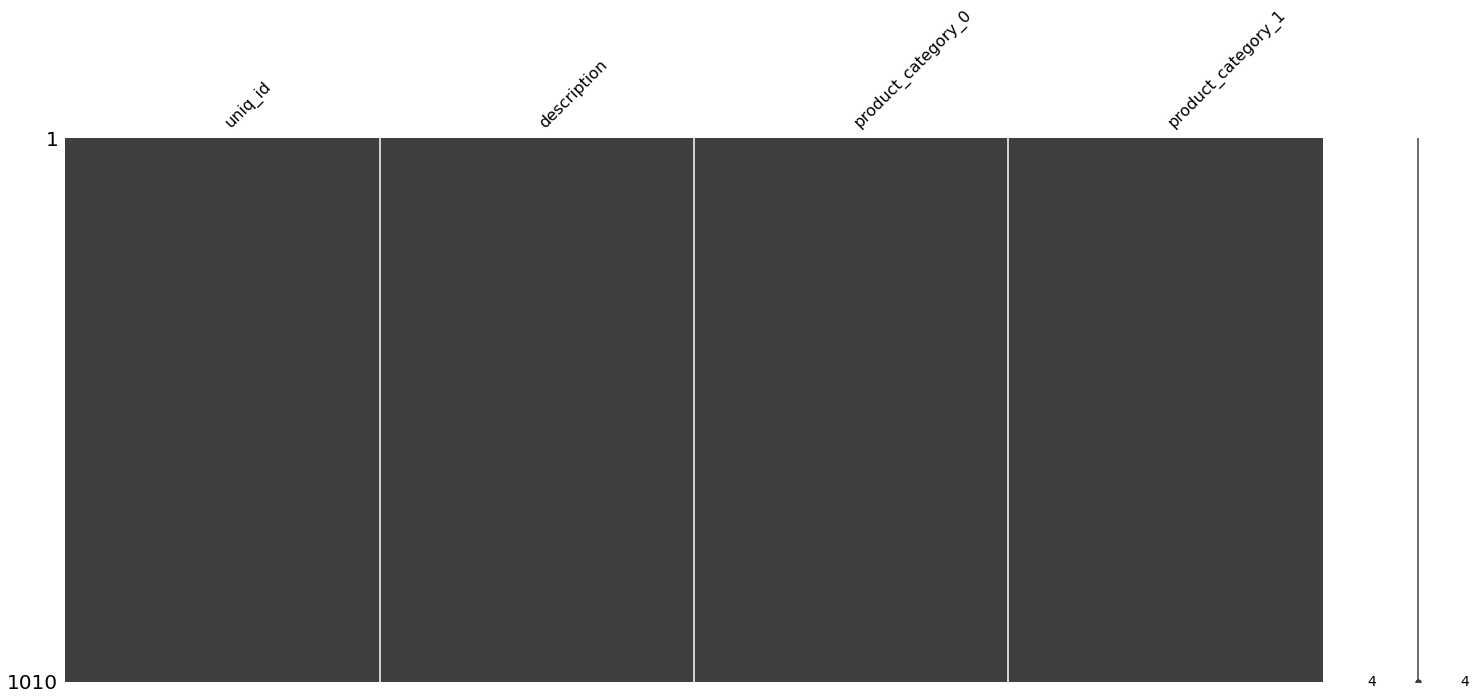

In [9]:
msno.matrix(txt_df)

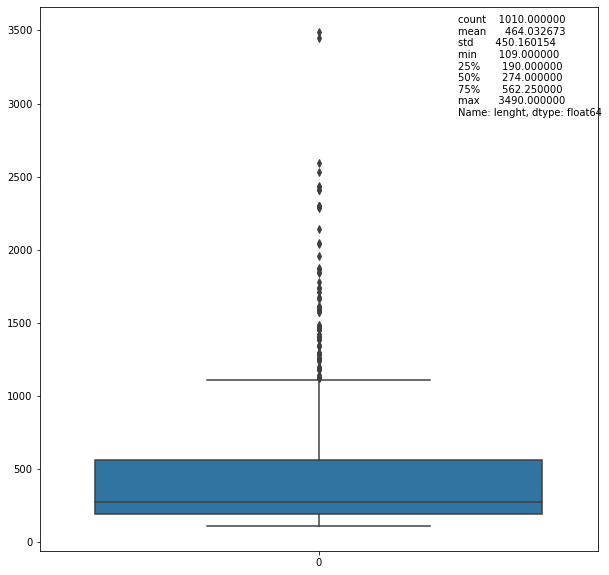

In [10]:
txt_df['lenght'] = txt_df['description'].apply(lambda x: len(x))
txt_df['lenght'].describe()
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(data = txt_df['lenght'],
            ax=ax
           )
ax.text(0.75,
        0.8,
        str(txt_df['lenght'].describe()),
        transform=ax.transAxes
        )
plt.show()

In [11]:
out = []
q1 = txt_df['lenght'].quantile(0.25)
q3 = txt_df['lenght'].quantile(0.75)
interq = q3-q1
out = txt_df.loc[(txt_df['lenght'] < (q1-1.5*interq)) | (txt_df['lenght'] > (q3+1.5*interq))]
print(out.shape[0], out.shape[0]/txt_df.shape[0]*100)
out.sort_values(by='lenght', ascending = False).iloc[1, 1]

84 8.316831683168317


'Key Features of Sunlast 16 inch Laptop Backpack Laptop Backpack with solar panel Comfortable back panel with air-flow design Adjustable sternum strap Large outer elasticated mesh side pocket and a top carry handle Padded and Adjustable shoulder straps Charge your mobile by solar power Mobile power backup option Long life Easy to use,Sunlast 16 inch Laptop Backpack (Yellow) Price: Rs. 2,348 The Sunlast New Laptop Backpack with Solar Panel ensures complete safety to your laptop with its high-quality built and wide range of built-in features. With the inside of this bag featuring a protective padding, you can be rest assured that the laptop inside it will be well cushioned from any accidental damage caused when you bump into any surface. As it is made of nylon, this laptop backpack can withstand abrasions and is long lasting. This Sunlast Backpack comes with a unique solar panel which allows you to charge your mobile phone anywhere anytime. This Sunlast Laptop backpack with solar panel i

In [12]:
# check if all the sentences are english
from spacy_language_detection import LanguageDetector
from spacy.language import Language
import spacy

def get_lang_detector(nlp, name):
    return LanguageDetector(seed=38)
nlp = spacy.load("en_core_web_sm")
Language.factory("language_detector", func=get_lang_detector)
nlp.add_pipe('language_detector', last=True)

In [13]:
def lang_detect(x):
    results = nlp(x)._.language
    return results['language']

txt_df['lang'] = txt_df['description'].apply(lambda x: lang_detect(x))
txt_df['lang'].unique()

array(['en', 'it'], dtype=object)

In [14]:
idx = txt_df.loc[txt_df['lang'] == 'it'].index
txt_df = txt_df.drop(index = idx)

## Preprocessing

In [15]:
import nltk 
import string
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nico\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nico\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Nico\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nico\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Nico\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [16]:
words = set(nltk.corpus.words.words())
stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = nltk.stem.WordNetLemmatizer()

def prepro(x):
    prepro_list = []
    for sentence in x:
        sent_wo_punc = "".join([i.lower() for i in sentence if i not in string.punctuation])
        sent_wo_num = ''.join([i for i in sent_wo_punc if not i.isdigit()])
        sent_token = nltk.tokenize.word_tokenize(sent_wo_num)
        sent_token_wo_punc = [i for i in sent_token if i not in string.punctuation]
        token_wo_stop = [i for i in sent_token_wo_punc if i not in stopwords]
        lem = (lemmatizer.lemmatize(i) for i in token_wo_stop if i not in string.punctuation)
        clean = ' '.join(i for i in lem if len(str(i)) > 2)
        prepro_list.append(clean)
    return prepro_list

In [17]:
sentence = txt_df['description'].sample()

In [18]:
sentence = txt_df['description'].sample()
sent_wo_punc = "".join([i.lower() for i in sentence if i not in string.punctuation])
sent_wo_num = ''.join([i for i in sent_wo_punc if not i.isdigit()])
sent_token = nltk.tokenize.word_tokenize(sent_wo_num)
sent_token_wo_punc = [i for i in sent_token if i not in string.punctuation]
token_wo_stop = [i for i in sent_token_wo_punc if i not in stopwords]
lem = (lemmatizer.lemmatize(i) for i in token_wo_stop if i not in string.punctuation)
clean = ' '.join(i for i in lem if len(str(i)) > 2)
clean

'buy lal haveli rajasthani wooden crafted unique chowkidar statue wooden darwam showpiece online lal haveli rajasthani wooden crafted unique chowkidar statue wooden darwam showpiece best price free shipping cash delivery genuine product day replacement guarantee'

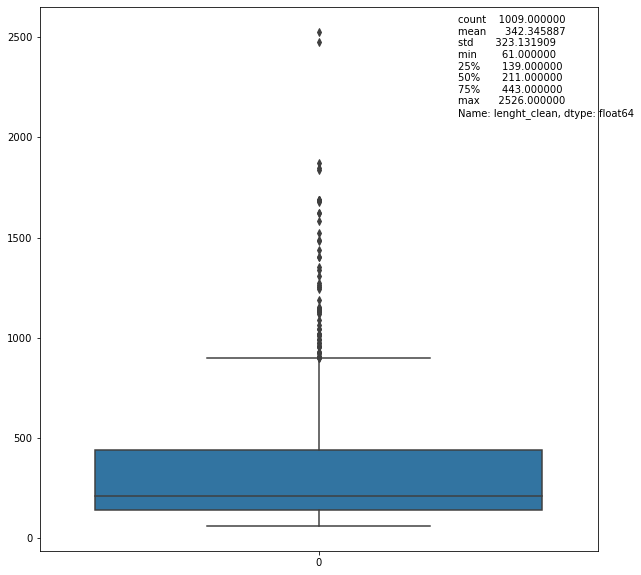

In [19]:
txt_df['description_clean'] = prepro(txt_df['description'])
txt_df['lenght_clean'] = txt_df['description_clean'].apply(lambda x: len(x))
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(data = txt_df['lenght_clean'],
            ax=ax
           )
ax.text(0.75,
        0.8,
        str(txt_df['lenght_clean'].describe()),
        transform=ax.transAxes
        )
plt.show()

In [21]:
idx = txt_df.sample().index
txt_df = txt_df.drop(index = idx)

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
txt_df['labels_0'] = le.fit_transform(txt_df['product_category_0'])
txt_df['labels_1'] = le.fit_transform(txt_df['product_category_1'])

## Bag of Words

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
bag_of_words = vectorizer.fit_transform(txt_df['description_clean'].tolist())

In [24]:
from sklearn import cluster, metrics
clus = cluster.KMeans(n_clusters = txt_df['product_category_0'].unique().shape[0], random_state = 38)
clus1 = cluster.KMeans(n_clusters = txt_df['product_category_1'].unique().shape[0], random_state = 38)
clus.fit(bag_of_words)
clus1.fit(bag_of_words)
ari = metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 )
ari1 = metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 )
print('The ari scores are {} for categorie 0 and {} for categorie 1.'.format(ari, ari1))

The ari scores are 0.038707922427780865 for categorie 0 and 0.1921529872369165 for categorie 1.


## Tf-Idf

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vect = TfidfVectorizer(stop_words='english')
tf_idf_matrix = tf_idf_vect.fit_transform(txt_df['description_clean'].tolist())
clus.fit(tf_idf_matrix)
clus1.fit(tf_idf_matrix)
ari = metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 )
ari1 = metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 )
print('The ari scores are {} for categorie 0 and {} for categorie 1.'.format(ari, ari1))

The ari scores are 0.28292942879316785 for categorie 0 and 0.405491881548357 for categorie 1.


### n-gram

In [26]:
# Bag of words
for i in range(1, 6):
    vectorizer = CountVectorizer(stop_words='english', ngram_range=(i, i))
    bag_of_words = vectorizer.fit_transform(txt_df['description_clean'].tolist())
    clus.fit(bag_of_words)
    clus1.fit(bag_of_words)
    ari = metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 )
    ari1 = metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 )
    print('The ari scores for the {}-gram are {} for categorie 0 and {} for categorie 1.'.format(i, ari, ari1))


The ari scores for the 1-gram are 0.038707922427780865 for categorie 0 and 0.1921529872369165 for categorie 1.
The ari scores for the 2-gram are 0.11252862542132695 for categorie 0 and 0.1721714244190968 for categorie 1.
The ari scores for the 3-gram are 0.08936997724137975 for categorie 0 and 0.1881678267351953 for categorie 1.
The ari scores for the 4-gram are 0.17087590711133016 for categorie 0 and 0.1883617600528319 for categorie 1.
The ari scores for the 5-gram are 0.15710584506743994 for categorie 0 and 0.14943766223385832 for categorie 1.


In [27]:
# tf-idf
for i in range(1,6):
    tf_idf_vect = TfidfVectorizer(stop_words='english', ngram_range=(i, i))
    tf_idf_matrix = tf_idf_vect.fit_transform(txt_df['description_clean'].tolist())
    clus.fit(tf_idf_matrix)
    clus1.fit(tf_idf_matrix)
    ari = metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 )
    ari1 = metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 )
    print('The ari scores for the {}-gram are {} for categorie 0 and {} for categorie 1.'.format(i, ari, ari1))

The ari scores for the 1-gram are 0.28292942879316785 for categorie 0 and 0.405491881548357 for categorie 1.
The ari scores for the 2-gram are 0.2530357864170918 for categorie 0 and 0.29092268276851924 for categorie 1.
The ari scores for the 3-gram are 0.2526359666412971 for categorie 0 and 0.22025286714073355 for categorie 1.
The ari scores for the 4-gram are 0.1603218114165004 for categorie 0 and 0.23984023225072817 for categorie 1.
The ari scores for the 5-gram are 0.18724553878686553 for categorie 0 and 0.15220391834049826 for categorie 1.


In [28]:
txt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1008 entries, 0 to 1049
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   uniq_id             1008 non-null   object
 1   description         1008 non-null   object
 2   product_category_0  1008 non-null   object
 3   product_category_1  1008 non-null   object
 4   lenght              1008 non-null   int64 
 5   lang                1008 non-null   object
 6   description_clean   1008 non-null   object
 7   lenght_clean        1008 non-null   int64 
 8   labels_0            1008 non-null   int32 
 9   labels_1            1008 non-null   int32 
dtypes: int32(2), int64(2), object(6)
memory usage: 78.8+ KB


## Word2Vec

In [29]:
txt_df['description_token'] = txt_df['description_clean'].apply(lambda x: nltk.tokenize.word_tokenize(x))

In [30]:
from gensim.models import Word2Vec
model = Word2Vec(vector_size = 300)
model.build_vocab(txt_df['description_token'].tolist())
model.train(txt_df['description_token'].tolist(), total_examples=model.corpus_count, epochs=35)

(1199841, 1719900)

In [31]:
model.corpus_count

1008

In [32]:
vector = model.wv

In [33]:
vector.most_similar("natural")

[('vibrantly', 0.7792213559150696),
 ('conditioner', 0.7347131371498108),
 ('oudh', 0.7250983715057373),
 ('smooth', 0.7247493863105774),
 ('deep', 0.7199403047561646),
 ('lip', 0.7197373509407043),
 ('arabic', 0.7077121734619141),
 ('styling', 0.7054387331008911),
 ('pencil', 0.7052897810935974),
 ('bathing', 0.6957002282142639)]

In [34]:
vector.most_similar('computer')

[('keyboard', 0.9390594959259033),
 ('vacuum', 0.91941899061203),
 ('connect', 0.9157864451408386),
 ('cleaner', 0.9085255265235901),
 ('desktop', 0.8910144567489624),
 ('air', 0.8909555077552795),
 ('device', 0.8802198767662048),
 ('attachment', 0.8456305861473083),
 ('port', 0.8359788656234741),
 ('cleaning', 0.8350987434387207)]

In [35]:
def get_mean(vectors, document):
    # check if each token is in the vocab (min =5)
    doc = [i for i in document if i in vectors.index_to_key]
    mean = np.mean(vectors[doc], axis = 0)
    return mean

In [36]:
txt_df['embeded_doc'] = txt_df['description_token'].apply(lambda x: get_mean(vector, x))

In [37]:
embeded_doc = pd.DataFrame(txt_df['embeded_doc'].tolist())
clus.fit(embeded_doc)
clus1.fit(embeded_doc)
ari = metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 )
ari1 = metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 )
print('The ari scores are {} for categorie 0 and {} for categorie 1.'.format(ari, ari1))

The ari scores are 0.2542156532395425 for categorie 0 and 0.4813849543289147 for categorie 1.


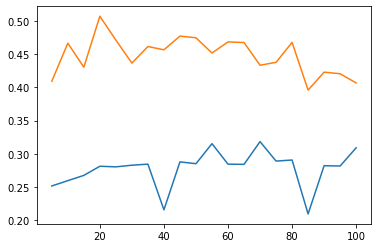

In [38]:
ari_l = []
ari_l1 = []
for i in np.arange(5,105,5):
    model.train(txt_df['description_token'].tolist(), total_examples=model.corpus_count, epochs=i)
    vector = model.wv
    temp = txt_df['description_token'].apply(lambda x: get_mean(vector, x))
    temp = pd.DataFrame(temp.tolist())
    clus.fit(temp)
    clus1.fit(temp)
    ari_l.append(metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 ))
    ari_l1.append(metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 ))
plt.plot(np.arange(5,105,5),ari_l)
plt.plot(np.arange(5,105,5),ari_l1)
plt.show()    

### n-gram

In [39]:
from gensim.models import phrases

In [40]:
bigrams = phrases.Phrases(txt_df['description_token'], threshold=10.0)
model2 = Word2Vec(bigrams[txt_df['description_token']], vector_size = 300)
model2.train(txt_df['description_token'], total_examples=model2.corpus_count, epochs=model2.epochs)

(169153, 245700)

In [41]:
vector2 = model2.wv
vector2.most_similar('computer')

[('right', 0.9989351630210876),
 ('apple', 0.9985853433609009),
 ('pro', 0.9980522394180298),
 ('clublaptop', 0.9978201389312744),
 ('connect', 0.9975151419639587),
 ('rega', 0.9973629713058472),
 ('dvtx', 0.9972447156906128),
 ('apply', 0.9971692562103271),
 ('device', 0.9969062209129333),
 ('cable', 0.9967887997627258)]

In [42]:
temp = txt_df['description_token'].apply(lambda x: get_mean(vector2, x))
temp = pd.DataFrame(temp.tolist())
clus.fit(temp)
clus1.fit(temp)
ari = metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 )
ari1 = metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 )
print('The ari scores are {} for categorie 0 and {} for categorie 1.'.format(ari, ari1))

The ari scores are 0.25633260961355103 for categorie 0 and 0.254728158080264 for categorie 1.


In [43]:
# test with a classifier 
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV

xgb_class = xgb.XGBClassifier()
class_df = pd.DataFrame({'mean_wv': txt_df['description_token'].apply(lambda x: get_mean(vector2, x))})
class_df = pd.DataFrame(class_df['mean_wv'].tolist())
xtrain, xtest, ytrain, ytest = train_test_split(class_df, txt_df['labels_0'], test_size = 0.8, stratify = txt_df['labels_0'])

xgb_class.fit(xtrain, ytrain)
xgb_class.score(xtest, ytest)

0.7385377942998761

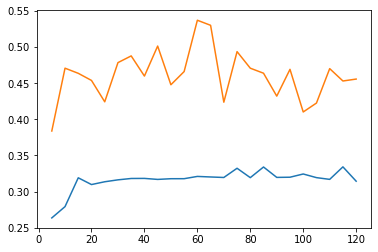

In [44]:
ari_l = []
ari_l1 = []
for i in np.arange(5,125,5):
    model2.train(txt_df['description_token'].tolist(), total_examples=model2.corpus_count, epochs=i)
    vector2 = model2.wv
    temp = txt_df['description_token'].apply(lambda x: get_mean(vector2, x))
    temp = pd.DataFrame(temp.tolist())
    clus.fit(temp)
    clus1.fit(temp)
    ari_l.append(metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 ))
    ari_l1.append(metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 ))
plt.plot(np.arange(5,125,5),ari_l)
plt.plot(np.arange(5,125,5),ari_l1)
plt.show()   

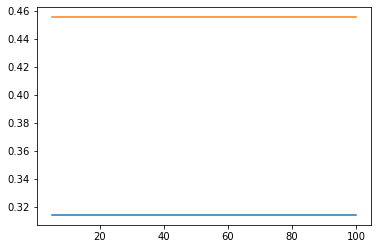

In [45]:
# test with skipgram instead of cbow
model3 = Word2Vec(vector_size = 300,sg =1)
model3.build_vocab(txt_df['description_token'].tolist())
ari_l = []
ari_l1 = []
for i in np.arange(5,105,5):
    model3.train(txt_df['description_token'].tolist(), total_examples=model2.corpus_count, epochs=i)
    vector3 = model2.wv
    temp = txt_df['description_token'].apply(lambda x: get_mean(vector3, x))
    temp = pd.DataFrame(temp.tolist())
    clus.fit(temp)
    clus1.fit(temp)
    ari_l.append(metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 ))
    ari_l1.append(metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 ))
plt.plot(np.arange(5,105,5),ari_l)
plt.plot(np.arange(5,105,5),ari_l1)
plt.show()

In [46]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

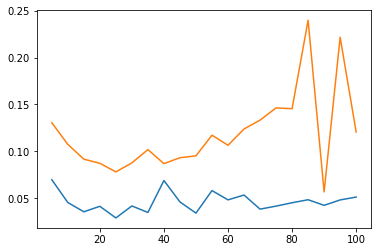

In [47]:

tagged_txt = [TaggedDocument(d, [i]) for i, d in enumerate(txt_df['description_token'].tolist())]
ari_l = []
ari_l1 = []
for i in np.arange(5,105,5):
    model4 = Doc2Vec(tagged_txt, epochs = i, vector_size = 300)
    temp = txt_df['description_token'].apply(lambda x: model4.infer_vector(x))
    temp = pd.DataFrame(temp.tolist())
    clus.fit(temp)
    clus1.fit(temp)
    ari_l.append(metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 ))
    ari_l1.append(metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 ))
plt.plot(np.arange(5,105,5),ari_l)
plt.plot(np.arange(5,105,5),ari_l1)
plt.show()   

## BERT

In [48]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [49]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [50]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

In [51]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import transformers 
from transformers import *

C:\Users\Nico\AppData\Roaming\Python\Python39\site-packages\transformers\generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import TFGenerationMixin` instead.
  warnings.warn(


In [52]:
# Hugging Face
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
        if mode=='Fine_Tune':
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.hidden_states[-1]
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
     
    return features_bert, last_hidden_states_tot

In [53]:
len(txt_df['description_clean'].tolist())

1008

In [54]:
max_length = 68
batch_size = 8
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = txt_df['description_clean'].tolist()

loading configuration file config.json from cache at C:\Users\Nico/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file tf_model.h5 from cache at C:\Users\Nico/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b

In [55]:
# Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

loading configuration file config.json from cache at C:\Users\Nico/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file vocab.txt from cache at C:\Users\Nico/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\vocab.txt

1/1 [==============================] - 0s 429ms/step


In [56]:
features_bert.shape

(1008, 768)

In [57]:
clus.fit(features_bert)
clus1.fit(features_bert)
ari = metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 )
ari1 = metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 )
print('The ari scores are {} for categorie 0 and {} for categorie 1.'.format(ari, ari1))

The ari scores are 0.29270270938581117 for categorie 0 and 0.34074605776475575 for categorie 1.


In [58]:
model_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
bert_layer = hub.KerasLayer(model_url, trainable=True)

In [59]:
max_length = 64
batch_size = 8
model_type = 'bert-base-uncased'
model = bert_layer

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='TFhub')

loading configuration file config.json from cache at C:\Users\Nico/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file vocab.txt from cache at C:\Users\Nico/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\vocab.txt

In [60]:
clus.fit(features_bert)
clus1.fit(features_bert)
ari = metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 )
ari1 = metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 )
print('The ari scores are {} for categorie 0 and {} for categorie 1.'.format(ari, ari1))

The ari scores are 0.2884129236073602 for categorie 0 and 0.3291137961982065 for categorie 1.


### Fine-Tune

In [61]:
# let's try to fine-tune this
from tensorflow.keras.optimizers import Adam
#tokenize
bert_tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
max_length = 34
doc_token = bert_tokenizer(sentences,max_length=max_length, padding = 'max_length', truncation = True, return_tensors="tf", return_attention_mask = False, return_token_type_ids=False)

loading configuration file config.json from cache at C:\Users\Nico/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file vocab.txt from cache at C:\Users\Nico/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\vocab.txt

In [62]:
temp = pd.DataFrame(sentences)
def tokenize_dataset(data):
    # Keys of the returned dictionary will be added to the dataset as columns
    return bert_tokenizer(data[0])


temp = temp.apply(tokenize_dataset)

In [63]:
model_ft = TFAutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=47,output_hidden_states=True)
model_ft.compile(optimizer=Adam(3e-5))


loading configuration file config.json from cache at C:\Users\Nico/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6",
    "7": "LABEL_7",
    "8": "LABEL_8",
    "9": "LABEL_9",
    "10": "LABEL_10",
    "11": "LABEL_11",
    "12": "LABEL_12",
    "13": "LABEL_13",
    "14": "LABEL_14",
    "15": "LABEL_15",
    "16": "LABEL_16",
    "17": "LABEL_17",
    "18": "LABEL_18",
    "19": "LABEL_19",
    "20": "LABEL_20",
    "21": "LABEL_21",
    "22": "LABEL_22",
    "23": "LABEL_23",
   

In [64]:
labels = np.array(txt_df['labels_1'])

model_ft.fit(doc_token['input_ids'], labels)

32/32 [==============================] - 101s 3s/step - loss: 3.3070


In [65]:
sentences[0]

'key feature elegance polyester multicolor abstract eyelet door curtain floral curtainelegance polyester multicolor abstract eyelet door curtain height pack price curtain enhances look interiorsthis curtain made high quality polyester fabricit feature eyelet style stitch metal ringit make room environment romantic lovingthis curtain ant wrinkle anti shrinkage elegant apparancegive home bright modernistic appeal design surreal attention sure steal heart contemporary eyelet valance curtain slide smoothly draw apart first thing morning welcome bright sun ray want wish good morning whole world draw close evening create special moment joyous beauty given soothing print bring home elegant curtain softly filter light room get right amount sunlightspecifications elegance polyester multicolor abstract eyelet door curtain height pack general brand elegance designed door type eyelet model name abstract polyester door curtain set model duster color multicolor dimension length box number content sa

In [66]:
bert_tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
max_length = 34

input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[0], 
                                                                      bert_tokenizer, max_length)

outputs = model_ft.predict([input_ids, attention_mask, token_type_ids], batch_size=8)


loading configuration file config.json from cache at C:\Users\Nico/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file vocab.txt from cache at C:\Users\Nico/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\vocab.txt

134/134 [==============================] - 32s 215ms/step


In [67]:
outputs.hidden_states[-1][-1].shape

(34, 768)

In [68]:
len(sentences[0])

1066

In [69]:
max_length = 64
batch_size = 8
model_type = 'bert-base-uncased'
model = model_ft

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='Fine_Tune')

loading configuration file config.json from cache at C:\Users\Nico/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file vocab.txt from cache at C:\Users\Nico/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\vocab.txt

1/1 [==============================] - 0s 378ms/step


In [70]:
clus.fit(features_bert)
clus1.fit(features_bert)
ari = metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 )
ari1 = metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 )
print('The ari scores are {} for categorie 0 and {} for categorie 1.'.format(ari, ari1))

The ari scores are 0.46044217520039105 for categorie 0 and 0.5988782178042618 for categorie 1.


## USE

In [71]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [72]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    return features

In [73]:
batch_size = 8
features_USE = feature_USE_fct(sentences, batch_size)

In [74]:
clus.fit(features_USE)
clus1.fit(features_USE)
ari = metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 )
ari1 = metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 )
print('The ari scores are {} for categorie 0 and {} for categorie 1.'.format(ari, ari1))

The ari scores are 0.33182821731934137 for categorie 0 and 0.39327634676792383 for categorie 1.


## LDA

In [75]:
from sklearn.decomposition import LatentDirichletAllocation
n_topics = 7

# Créer le modèle LDA
lda = LatentDirichletAllocation(
        n_components=n_topics, 
        max_iter=5,  
        learning_offset=50.,
        random_state=0)

# Fitter sur les données
lda.fit(bag_of_words)

LatentDirichletAllocation(learning_offset=50.0, max_iter=5, n_components=7,
                          random_state=0)

In [76]:
vectorizer.get_feature_names_out()

array(['aaa battery battery life hour',
       'aapno rajasthan lovely jewellery vanity',
       'aapno rajasthan marvel marble gold', ...,
       'zyxel data card flipkartcom genuine',
       'zyxel pla flipkartcom genuine product',
       'zyxel vmgba vdsl wireless vdsl'], dtype=object)

In [77]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 5
display_topics(lda, vectorizer.get_feature_names_out(), no_top_words)


Topic 0:
coffee mug freedom broadcast special mean youre sure quote say bring smile dont forget share broadcast special message holiday cheer cute catchy design mean youre
Topic 1:
number content sale package pack genuine product free shipping cash flipkartcom genuine product free shipping product free shipping cash delivery box number content sale package
Topic 2:
product free shipping cash delivery flipkartcom genuine product free shipping genuine product free shipping cash multicolor flipkartcom genuine product free number content sale package pack
Topic 3:
genuine product day replacement guarantee product day replacement guarantee free day replacement guarantee free shipping replacement guarantee free shipping cash guarantee free shipping cash delivery
Topic 4:
year come making perfect pick crafting ensuring design stay permanent perfect pick gift loved toodishwasher toodishwasher microwave safe product specification mug feature porcelain crafting ensuring
Topic 5:
number content s